## Transformations in Political Economy - Technological Change and Populism (POL63102)
### Exercise 2 - Solutions

---
This document guides you through Exercise 2. Please submit a python code file and a pdf document with all figures and tables produced to Moodle until Sunday 20th June.

---

1. Load the following data from Autor et al (2020): https://github.com/FelixHagemeister/POL63102/blob/cb34037598fbac33dc2dd6989396413e2f2956bc/data/house_2002_2016.dta

In [1]:
import pandas as pd
import linearmodels.iv as iv
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
from pathlib import Path
from stargazer.stargazer import Stargazer

df = pd.read_stata('C:/Users/felix/Dropbox/HfP/Teaching/SoSe21/Populism_Course/Autor_et_al_2020/2-FinalDataPackage/dta/house_2002_2016.dta')

2. Show summary statistics (count, mean, std, min, max, 25th, 50th, 75th percentiles) of the following variables:

 - *d2_turnout_2002_2010* Difference in turnout between 2002 and 2010
 - *d_imp_usch_pd* Measure of import competition from China
 - *l_sh_pop_white* Share of employed people identifying as "white"

In [2]:
df[["d2_turnout_2002_2010", "d_imp_usch_pd", "l_sh_pop_white"]].describe().T

,count,mean,std,min,25%,50%,75%,max
d2_turnout_2002_2010,2772.0,0.025468,0.085526,-0.621334,-0.031615,0.019879,0.075340,0.622716
d_imp_usch_pd,3772.0,0.754591,0.652882,-0.259663,0.343260,0.623485,0.966137,6.079161
l_sh_pop_white,3772.0,0.831168,0.165363,0.045083,0.741502,0.891992,0.963080,0.997392


3. Draw and save as *.png* file a scatter plot with a linear fit for the 2002-2010 difference in turnout on the y axis and import competition on the x axis.

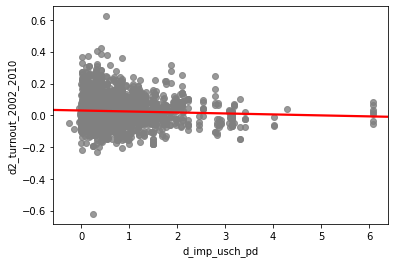

In [3]:
# Define y and x
y = df["d2_turnout_2002_2010"]
x = df["d_imp_usch_pd"]

#create scatterplot with regression line (without confidence bands)
sns.regplot(x, y, ci=None, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

# Save as .png
plt.savefig('C:/Users/felix/Dropbox/HfP/Teaching/SoSe21/Populism_Course/results/plot_ex2.png')

4. Run a simple linear regression model with the 2002-2010 difference in turnout as dependent and import competition as independent variable. Use heteroskedasticity-robust standard errors (HC2).

In [4]:
reg1 = smf.ols('d2_turnout_2002_2010 ~ d_imp_usch_pd', data=df).fit(cov_type='HC2')
print(reg1.summary())

                             OLS Regression Results                             
Dep. Variable:     d2_turnout_2002_2010   R-squared:                       0.002
Model:                              OLS   Adj. R-squared:                  0.002
Method:                   Least Squares   F-statistic:                     7.152
Date:                  Fri, 02 Jul 2021   Prob (F-statistic):            0.00753
Time:                          09:15:37   Log-Likelihood:                 2886.4
No. Observations:                  2772   AIC:                            -5769.
Df Residuals:                      2770   BIC:                            -5757.
Df Model:                             1                                         
Covariance Type:                    HC2                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0301  

5. Interpretation of the regression output: How big is the association between import competition and 2002-2010 change in turnout? Is it statistically significant?

In [5]:
# Write your answer here (no coding needed).
# One unit increase in import competition leads on average to a decrease of 0.0062 in 2002-2010 change in turnout.
# The effect is statistically significant at the 1 percent level (p<0.01).

6. Run a regression using *l_sh_pop_white* as control variable. Also use robust standard errors (HC2).

In [6]:
reg2 = smf.ols('d2_turnout_2002_2010 ~ d_imp_usch_pd + l_sh_pop_white', data=df).fit(cov_type='HC2')
print(reg2.summary())

                             OLS Regression Results                             
Dep. Variable:     d2_turnout_2002_2010   R-squared:                       0.008
Model:                              OLS   Adj. R-squared:                  0.008
Method:                   Least Squares   F-statistic:                     10.05
Date:                  Fri, 02 Jul 2021   Prob (F-statistic):           4.48e-05
Time:                          09:15:37   Log-Likelihood:                 2895.0
No. Observations:                  2772   AIC:                            -5784.
Df Residuals:                      2769   BIC:                            -5766.
Df Model:                             2                                         
Covariance Type:                    HC2                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.065

7. In another regression specification, use district fixed effects. Note that the variable for congressional districts is called *congressionaldistrict*). Also use robust standard errors (HC2).

In [7]:
reg_fe = smf.ols('d2_turnout_2002_2010 ~ d_imp_usch_pd + l_sh_pop_white + C(congressionaldistrict)', data=df).fit(cov_type='HC2')
print(reg_fe.summary())

                             OLS Regression Results                             
Dep. Variable:     d2_turnout_2002_2010   R-squared:                       0.584
Model:                              OLS   Adj. R-squared:                  0.527
Method:                   Least Squares   F-statistic:                 1.870e+10
Date:                  Fri, 02 Jul 2021   Prob (F-statistic):               0.00
Time:                          09:15:38   Log-Likelihood:                 4099.7
No. Observations:                  2772   AIC:                            -7529.
Df Residuals:                      2437   BIC:                            -5544.
Df Model:                           334                                         
Covariance Type:                    HC2                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

C:\Users\felix\Anaconda3\lib\site-packages\statsmodels\base\model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 433, but rank is 279
  'rank is %d' % (J, J_), ValueWarning)


8. Create a summary table of your results using the *stargazer* module. Omit the coefficients of the fixed effects and add a line indicating which specification uses fixed effects. Rename variable names to "Delta Turnout 2002-2010", "Import Competition" and "Share identifying as white". Export as a *.tex* file.

In [8]:
stargazer_tab = Stargazer([reg1, reg2, reg_fe])
stargazer_tab.covariate_order({'d_imp_usch_pd': 'Import Competition', 'l_sh_pop_white': 'Share Identifying as white'})
stargazer_tab.add_custom_notes(['Data from Autor et al. (2020)', 'Heteroskedasticity-Robust Standard Errors'])
stargazer_tab.add_line('Controls', ['', 'X','X'])
stargazer_tab.add_line('District FEs', ['', '','X'])
stargazer_tab.dependent_variable_name('$\Delta$ Turnout 2002-2010:')
stargazer_tab.significant_digits(3)
stargazer_tab.show_degrees_of_freedom(False)
stargazer_tab.rename_covariates({'d_imp_usch_pd': 'Import Competition', 'l_sh_pop_white': 'Share Identifying as white'})
stargazer_tab

9. State and briefly explain the conditions for a valid instrument in instrumental variable estimation (IV).

In [9]:
# Write your answer here (no coding needed).
# (1) Relevance: Instrument z is partially correlated with
# the endogenous variable x1 (under controlling for exogenous
# explanatory variables x2). Under this condition exists first stage of the regression.
# (2) Exogeneity/Exclusion Restriction: Instrument z is not
# correlated with the error term. Therefore z is not correlated with any
# other determinants of the dependent variable.

10. What is the name of the research design using small windows to cutoffs in order to identify causal effects? Briefly give one example of how this can be applied.

In [10]:
# Write your answer here (no coding needed).
# Regression Discontinuity Design (RDD)
# Example: To evaluate the impact of studying medicine on salary, one could compare salaries of people with A-level scores 
# just above and just below a threshold that is set by policy to determine who is allowed to study medicine.

11. Create a pdf with your scatter plot with linear fit and the stargazer table, using latex (e.g. overleaf). 

(*Attention:* You might need to get rid of underscores in latex tables for compilation of the document.)